# Scatter Plot

Replicating the scatter plot from the [Datalytix blog post](https://www.datalytyx.com/eurovision-song-contest-regression-analysis-highlights-the-voting-patterns/).

In the blog post it's explained that:

> The plot is calculated using a performing country’s average points and the total points given to a specific country by a voter. The juicy part is the top right quadrant, and a set was created by picking out a selection where the average points received was over 5, and the total points received was over a 100. This removes highlights in the top left quadrant that are yet to become trends, leaving only consistent voting patterns.

In [ ]:
import pandas as pd
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle

py.init_notebook_mode(connected=True)

In [ ]:
# Load in the data
df = pd.read_csv('../data/eurovision_merged_covariates_03Feb.csv')
df.head()

In [ ]:
# Get the full set of country codes
countries = df['From country'].unique()
print('Number of countries: {}'.format(len(countries)))

In [ ]:
# Load the codes pickle so we can convert to proper names
with open('../data/country_codes_dict.pickle', 'rb') as f:
    codes = pickle.load(f)
# Reverse the keys and values
codes = {y: x.title() for x, y in codes.items()}
print('Number of codes: {}'.format(len(codes)))

In [ ]:
# Create a new dataframe containing the data for the scatter plot
votes = pd.DataFrame({'performer': [], 'voter': [], 'times_competed': [], 'times_voted': [], 'total_points': [], 'average_points': []})

# Compare every country with every other country
for performer in countries:
    times_competed = len(df.loc[df['code'] == performer]['Year'].unique())
    for voter in countries:
        times_voted = len(df.loc[(df['code'] == performer) & (df['From country'] == voter) & (df['Votes'] > 0)])
        total_points = df.loc[(df['code'] == performer) & (df['From country'] == voter)]['Votes'].sum()
        average_points = df.loc[(df['code'] == performer) & (df['Votes'] >= 0) & (df['From country'] == voter)]['Votes'].mean()
        votes.loc[len(votes)] = [codes[performer], codes[voter], times_competed, times_voted, total_points, average_points]
print('Check every country is matched with very other: {}'.format(len(countries)**2 == len(votes)))

<AxesSubplot: xlabel='total_points', ylabel='average_points'>

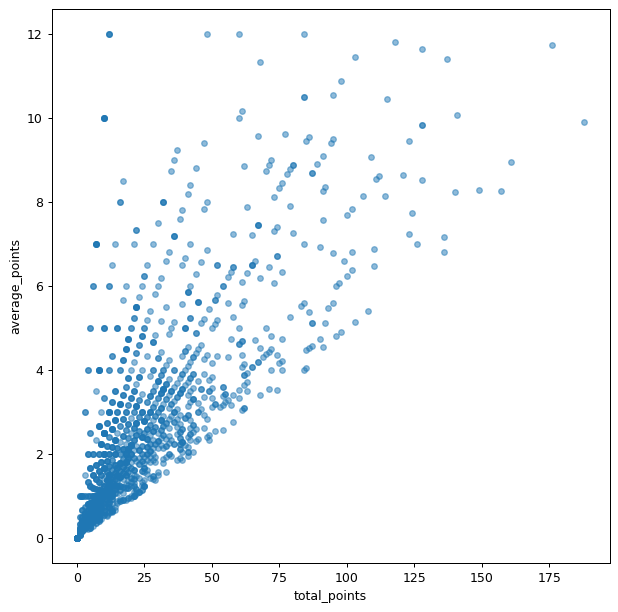

In [15]:
# Render a basic static scatter plot
fig = plt.figure(figsize=(8, 8), dpi=90)
votes.plot.scatter(x='total_points', y='average_points', alpha=0.5, ax = plt.gca())

In [ ]:
# Render an interactive (hoverable) plot
fig = px.scatter(votes, x='total_points', y='average_points')
fig.update_traces(hovertemplate='Performer: %{customdata[0]}'
                  + '<br>Voter: %{customdata[1]}'
                  + '<br>Total Eurovisions competed: %{customdata[2]}'
                  + '<br>Total times voted for by selected country: %{customdata[3]}'
                  + '<br>Total points given: %{customdata[4]}'
                  + '<br>Average points: %{customdata[5]:.2f}',
                  customdata=votes,
                  marker={'color': 'rgba(50, 50, 150, 0.1)', 'opacity': 0.5, 'size': 6,
                          'line': {'color': 'rgba(50, 50, 150, 1.0)', 'width': 1}})
fig.update_layout(hoverlabel_align='left', width=640, height=640, margin=dict(l=20, r=20, t=20, b=20),
                  xaxis={'title': 'Total voter points given to specific country'},
                  yaxis={'title': 'Average points'})
fig.show()